### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
imdb_data = pd.read_csv('IMDb Movies India.csv', encoding="latin1")

In [3]:
imdb_data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### EDA

In [4]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
imdb_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


### Data Preprocessing 

In [6]:
imdb_data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [7]:
imdb_data.dropna(subset=["Rating"], inplace = True)

In [8]:
imdb_data.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [9]:
imdb_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [10]:
imdb_data.isnull().sum()

Name           0
Year           0
Duration    1899
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [11]:
imdb_data['Votes'] = imdb_data['Votes'].str.replace(',','').astype(int)

# convert year columns
imdb_data['Year'] = imdb_data['Year'].str.strip('()').astype(int)

# convert duration columns
imdb_data['Duration'] = imdb_data['Duration'].str.strip('min')

In [12]:
imdb_data['Duration'].fillna(imdb_data['Duration'].median(),inplace=True)

In [13]:
imdb_data.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

### EDA

In [14]:
genre_counts = imdb_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Select the top N genres (e.g., top 10)
top_n_genres = genre_counts.head(10)
top_n_genres

,Genre,Count
0,Drama,1137
1,"Drama, Romance",443
2,"Action, Crime, Drama",417
3,Action,391
4,"Drama, Family",291
5,"Action, Drama",270
6,Comedy,251
7,"Comedy, Drama",237
8,Romance,226
9,"Comedy, Drama, Romance",213


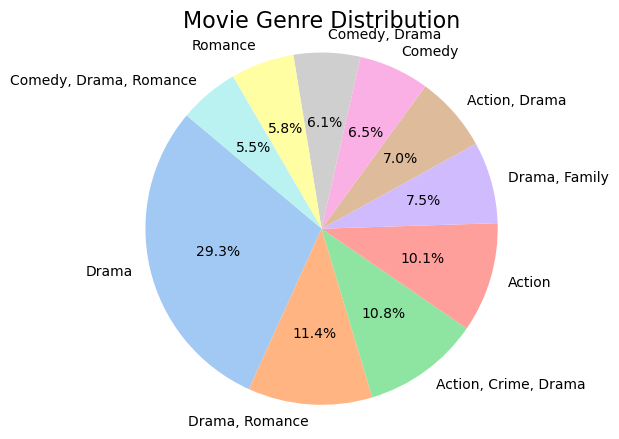

In [15]:
# Movie Genre Distribution
plt.figure(figsize=(5, 5))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

In [16]:
# Group the data by director and calculate the average rating
director_avg_rating = imdb_data.groupby('Director')['Rating'].mean().reset_index()

director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

top_directors = director_avg_rating.head(10)
top_directors

,Director,Rating
2243,Saif Ali Sayeed,10.0
2560,Sriram Raja,9.7
504,Bobby Kumar,9.6
322,Arvind Pratap,9.4
1513,Munni Pankaj,9.4
2598,Suhrud Godbole,9.4
1601,Nikhil Mahar,9.3
2809,Venkatesh Bk,9.3
1879,Rahul Mallick,9.3
1864,Raghav Jairath,9.3


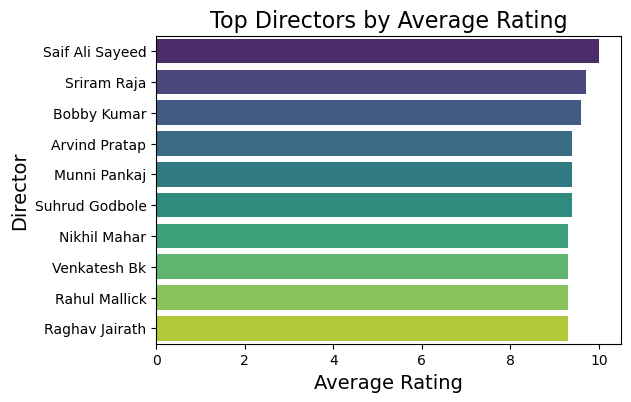

In [17]:
# Top Directors by Average Rating
plt.figure(figsize=(6, 4))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


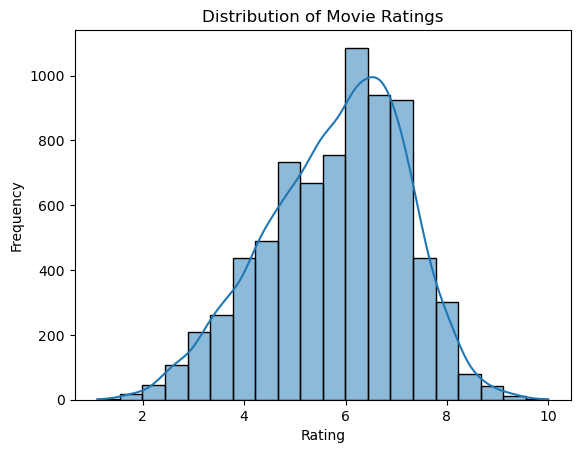

In [18]:
# Distribution of Movie Ratings
dist = sns.histplot(data = imdb_data, x = "Rating", bins = 20, kde = True)
dist.set_xlabel('Rating')
dist.set_ylabel('Frequency')
dist.set_title('Distribution of Movie Ratings')
plt.show()

In [19]:
df = pd.DataFrame(imdb_data)

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


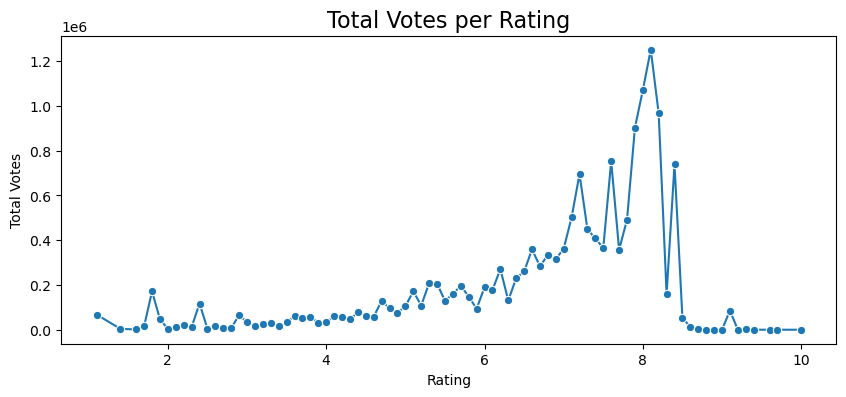

In [20]:
# Total Votes per Rating
rating_votes = df.groupby('Rating')['Votes'].sum().reset_index()
plt.figure(figsize=(10, 4))
plot = sns.lineplot(data=rating_votes, x='Rating', y='Votes', marker='o')
plot.set_xlabel('Rating')
plot.set_ylabel('Total Votes')
plot.set_title('Total Votes per Rating',fontsize=16)
plt.show()

In [21]:
yearly_movie_counts = imdb_data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


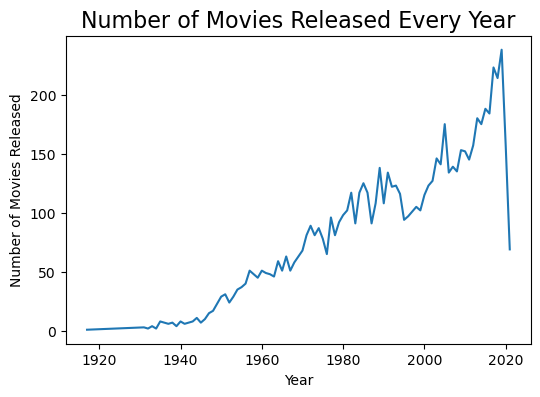

In [22]:
# Number of Movies Released Every Year
plt.figure(figsize=(6, 4))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Number of Movies Released', fontsize=10)

plt.show()

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


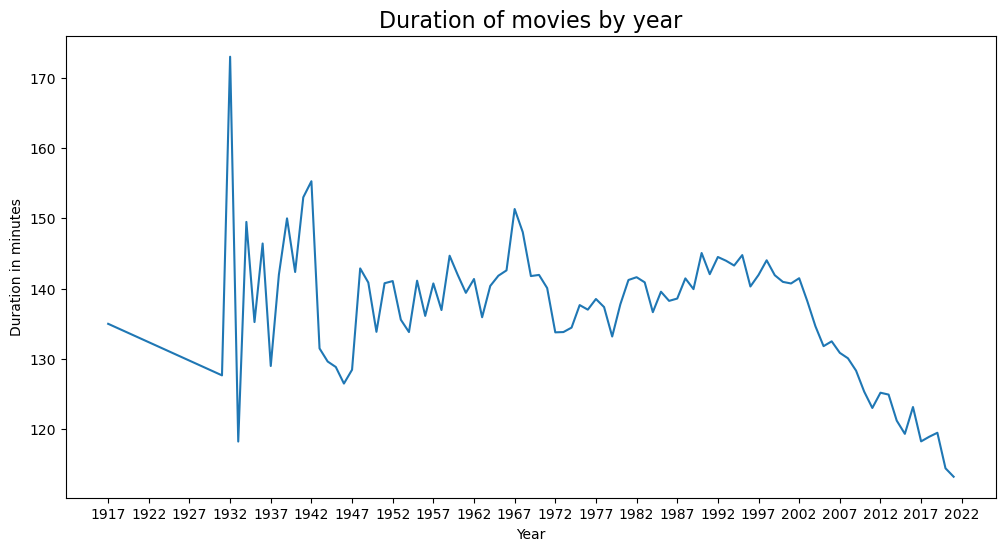

In [23]:
# Duration of movies by year
imdb_data['Duration'] = imdb_data['Duration'].astype(int)
imdb_data['Year'] = imdb_data['Year'].astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=imdb_data,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year', fontsize=16)
plt.xticks(np.arange(1917,2023,5))
plt.show()

In [24]:
imdb_data['Genre'] = imdb_data['Genre'].str.split(',')

# Create a new DataFrame with one row for each genre
genre_df = imdb_data.explode('Genre')

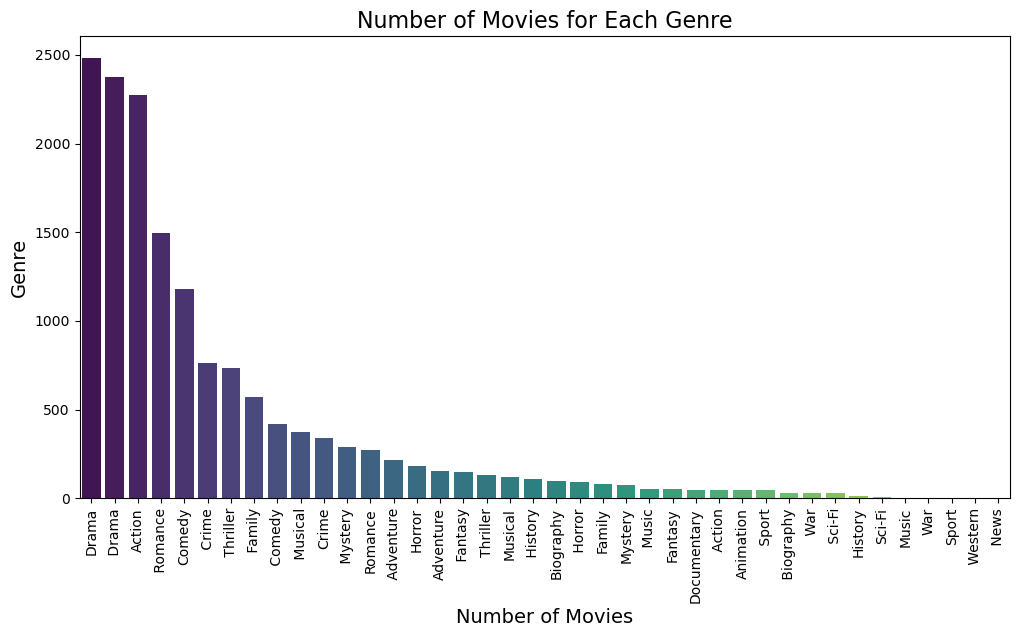

In [25]:
# Number of Movies for Each Genre
plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

In [26]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, ' News'),
  Text(1, 0, 'Documentary'),
  Text(2, 0, 'Music'),
  Text(3, 0, ' Biography'),
  Text(4, 0, ' History'),
  Text(5, 0, 'Biography'),
  Text(6, 0, 'History'),
  Text(7, 0, 'Sci-Fi'),
  Text(8, 0, ' Sport'),
  Text(9, 0, 'Fantasy'),
  Text(10, 0, ' Musical'),
  Text(11, 0, ' Family'),
  Text(12, 0, 'Drama'),
  Text(13, 0, ' War'),
  Text(14, 0, 'Adventure'),
  Text(15, 0, 'Family'),
  Text(16, 0, 'Musical'),
  Text(17, 0, 'Crime'),
  Text(18, 0, ' Music'),
  Text(19, 0, 'Animation'),
  Text(20, 0, ' Drama'),
  Text(21, 0, 'Comedy'),
  Text(22, 0, 'Sport'),
  Text(23, 0, ' Mystery'),
  Text(24, 0, ' Romance'),
  Text(25, 0, 'Mystery'),
  Text(26, 0, ' Fantasy'),
  Text(27, 0, ' Adventure'),
  Text(28, 0, ' Action'),
  Text(29, 0, ' Crime'),
  Text(30, 0, ' Thriller'),
  Text(31, 0, '

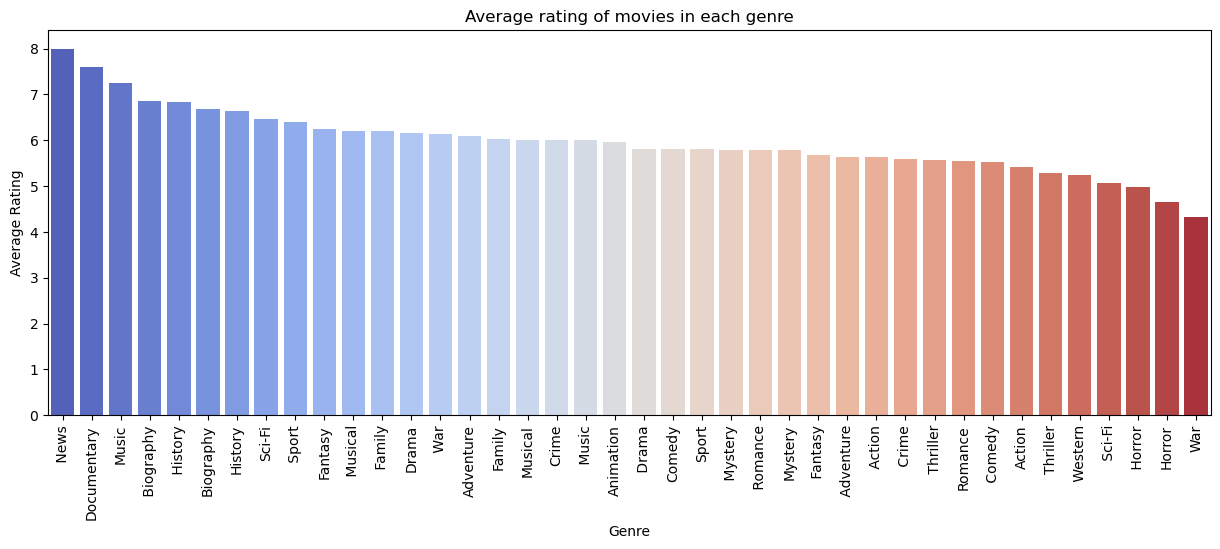

In [27]:
# Average rating of movies in each genre
plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)

### Feature Engineering 

In [28]:
# Encode categorical variables (e.g., userId, movieId)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

trans_data = imdb_data.drop(['Name'],axis=1)
# Transform Director columns
trans_data['Director'] = labelencoder.fit_transform(imdb_data['Director'])

# Transform Actors Columns
trans_data['Actor 1'] = labelencoder.fit_transform(imdb_data['Actor 1'])
trans_data['Actor 2'] = labelencoder.fit_transform(imdb_data['Actor 2'])
trans_data['Actor 3'] = labelencoder.fit_transform(imdb_data['Actor 3'])

trans_data['Genre'] = labelencoder.fit_transform(imdb_data['Genre'].apply(lambda x: ', '.join(x)))

trans_data.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,252,7.0,8,755,1686,2725,373
3,2019,110,205,4.4,35,1637,1500,865,2543
5,1997,147,175,4.7,827,1881,481,84,2422
6,2005,142,315,7.4,1086,2486,878,1346,2996
8,2012,82,351,5.6,326,161,2385,1416,1189


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
sc_data = scaler.fit_transform(trans_data)
sc_df = pd.DataFrame(sc_data,columns=trans_data.columns)

sc_df.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,0.980769,0.293333,0.607229,0.662921,0.000005,0.255499,0.698426,0.979511,0.123102
1,0.980769,0.296667,0.493976,0.370787,0.000051,0.553976,0.621375,0.310927,0.839274
2,0.769231,0.420000,0.421687,0.404494,0.001390,0.636548,0.199254,0.030194,0.799340
3,0.846154,0.403333,0.759036,0.707865,0.001828,0.841286,0.363712,0.483825,0.988779
4,0.913462,0.203333,0.845783,0.505618,0.000543,0.054484,0.987987,0.508986,0.392409


In [30]:
# correlation
corr_df = trans_data.corr(numeric_only=True)
corr_df['Rating'].sort_values(ascending=False)

Rating      1.000000
Votes       0.134655
Genre       0.122565
Actor 2     0.038852
Actor 3     0.031550
Actor 1     0.025089
Duration   -0.001801
Director   -0.003678
Year       -0.194990
Name: Rating, dtype: float64

### Model Selection and Training

In [31]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [32]:
# Split data into training and testing sets
X = trans_data.drop(['Rating'],axis=1)
y = trans_data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Build the model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[len(X_train.keys())]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

D:\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

In [35]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 316201.1250 - mae: 165.5874 - mse: 316218.7812 - val_loss: 29147.9414 - val_mae: 71.8509 - val_mse: 29214.1816
Epoch 2/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 27120.6543 - mae: 44.1776 - mse: 27128.3711 - val_loss: 108468.9375 - val_mae: 91.8209 - val_mse: 108981.1406
Epoch 3/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 233295.4844 - mae: 125.6922 - mse: 233305.8750 - val_loss: 4682.2905 - val_mae: 31.5797 - val_mse: 4701.5845
Epoch 4/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 12156.7021 - mae: 37.5900 - mse: 12157.9570 - val_loss: 4645.4531 - val_mae: 37.7883 - val_mse: 4643.5483
Epoch 5/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15613.5654 - mae: 43.8882 - mse: 15614.7188 - val_loss: 2386.7368 - val_mae: 21.4586 - val_mse: 2394.6533
Epoch 6/10
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 45645.5820 - mae: 64.5339 - mse: 45648.0508 - val_loss: 1350.3120 - val_mae: 17.9843 - val_mse: 13

### Model Evaluation

In [36]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print(f"Mean Absolute Error on Test Set: {mae}")

48/48 - 0s - 4ms/step - loss: 12123.3281 - mae: 38.0564 - mse: 12299.5420
Mean Absolute Error on Test Set: 38.05641555786133


### Model Deployment 

In [37]:
model.save('movie_rating_predictor.keras')

### Predict Ratings from new data

In [39]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('movie_rating_predictor.keras')

# Predict ratings for new data
new_data = pd.DataFrame(X,y)
predicted_rating = model.predict(new_data)
accuracy = print(f"Predicted Rating: {predicted_rating[0][0]}")

237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Rating: 0.014978302642703056
